<a href="https://colab.research.google.com/github/eoguh/Crop_Disease_Detection/blob/main/crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#
Here we import multiple models so we can try as many as we can and select the model that gives the least error.

In [ ]:
# Multiply Models

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor  # You may need to install xgboost: pip install xgboost


In [ ]:
from google.colab import drive
import os

In [ ]:
drive.mount('/content/drive')


ValueError: mount failed

In [ ]:
root_dir='/content/drive/MyDrive/Crop_Yield_Prediction/'

In [ ]:
# Load Data

data_path = os.path.join(root_dir, 'indiancrop_dataset_2.csv')

farm_data = pd.read_csv(data_path).drop(['STATE', 'CROP'], axis=1)



In [ ]:
# Split the data into features (X) and target (y)

X = farm_data.drop(columns=['CROP_YIELD'])
Y = farm_data['CROP_YIELD']


In [ ]:
# Get Dummies

X = pd.get_dummies(X)


In [ ]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [ ]:
# Scale the features


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#
Testing multiply models here

In [ ]:

# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor()
}

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    y_mean = np.mean(y_train)
    mse_baseline = mean_squared_error(y_test, np.full_like(y_test, y_mean))

    # Calculate the percentage error
    mean_target = np.mean(y_test)
    percentage_error = (rmse / mean_target) * 100

    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)

    results.append((name, mse, rmse, r2, percentage_error, mape))
    print(f"{name}: MSE = {mse:.2f}, RMSE = {rmse:.2f}, R2 = {r2:.4f}, Percentage Error = {percentage_error:.2f}%")

# Create dataframe of results
results_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "R2", "Percentage Error", "MAPE"])
print("\nSummary of Model Performance:\n")
print(results_df.sort_values(by='RMSE'))

Linear Regression: MSE = 6943217.13, RMSE = 2635.00, R2 = -0.0146, Percentage Error = 100.01%
Ridge Regression: MSE = 6942574.01, RMSE = 2634.88, R2 = -0.0146, Percentage Error = 100.00%
Lasso Regression: MSE = 6940741.99, RMSE = 2634.53, R2 = -0.0143, Percentage Error = 99.99%
ElasticNet Regression: MSE = 6794147.33, RMSE = 2606.56, R2 = 0.0071, Percentage Error = 98.93%
Decision Tree: MSE = 14622152.48, RMSE = 3823.89, R2 = -1.1368, Percentage Error = 145.13%
Random Forest: MSE = 9214625.17, RMSE = 3035.56, R2 = -0.3466, Percentage Error = 115.21%
Gradient Boosting: MSE = 7639286.16, RMSE = 2763.93, R2 = -0.1164, Percentage Error = 104.90%
XGBoost: MSE = 11360748.00, RMSE = 3370.57, R2 = -0.6602, Percentage Error = 127.93%
AdaBoost: MSE = 17051675.46, RMSE = 4129.37, R2 = -1.4918, Percentage Error = 156.73%
KNN Regressor: MSE = 9146692.82, RMSE = 3024.35, R2 = -0.3366, Percentage Error = 114.79%

Summary of Model Performance:

                   Model           MSE         RMSE      

Select and train the model Here

In [ ]:
# Train a RandomForestRegressor model

# model = ElasticNet()
# model = RandomForestRegressor(random_state=42)
model = AdaBoostRegressor(random_state=42)


model.fit(X_train, y_train)


AdaBoostRegressor(random_state=42)

Evaluate the model performance


In [ ]:
# Test the model

y_pred = model.predict(X_test)

In [ ]:
# Calculate the error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)




Mean Squared Error: 17051675.462436788
Root Mean Squared Error: 4129.367440957124


#
Moving over to making predictions

In [ ]:
# Function to make a single prediction
def predict_crop_yield(model, scaler, input_data):
    """
    Predict crop yield given input parameters.

    Parameters:
    model: trained machine learning model
    scaler: trained scaler used during training
    input_data: dictionary containing input parameters

    Returns:
    Predicted crop yield
    """

    # Convert input dictionary to DataFrame
    input_df = pd.DataFrame([input_data])

    # Select only relevant columns (should match training features)
    feature_columns = ['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL', 'CROP_CODE']
    input_df = input_df[feature_columns]

    # Scale input data using same scaler as training
    input_scaled = scaler.transform(input_df)

    # Predict crop yield
    prediction = model.predict(input_scaled)

    return prediction[0]  # Return single value


In [ ]:
def get_user_input():
    print("Enter the following parameters:")
    N_SOIL = float(input("N_SOIL: "))
    P_SOIL = float(input("P_SOIL: "))
    K_SOIL = float(input("K_SOIL: "))
    TEMPERATURE = float(input("TEMPERATURE: "))
    HUMIDITY = float(input("HUMIDITY: "))
    ph = float(input("ph: "))
    RAINFALL = float(input("RAINFALL: "))
    crop_name = input("CROP Name (e.g., Rice, Maize, etc.): ")

    # Crop code mapping
    crop_code_mapping = {
        'Rice': 1, 'Maize': 2, 'ChickPea': 3, 'KidneyBeans': 4, 'PigeonPeas': 5,
        'MothBeans': 6, 'MungBean': 7, 'Blackgram': 8, 'Lentil': 9, 'Pomegranate': 10,
        'Banana': 11, 'Mango': 12, 'Grapes': 13, 'Watermelon': 14, 'Muskmelon': 15,
        'Apple': 16, 'Orange': 17, 'Papaya': 18, 'Coconut': 19, 'Cotton': 20, 'Jute': 21, 'Coffee': 22
    }

    CROP_CODE = crop_code_mapping.get(crop_name, 1)  # Default to Rice if not found

    return {
        'N_SOIL': N_SOIL,
        'P_SOIL': P_SOIL,
        'K_SOIL': K_SOIL,
        'TEMPERATURE': TEMPERATURE,
        'HUMIDITY': HUMIDITY,
        'ph': ph,
        'RAINFALL': RAINFALL,
        'CROP_CODE': CROP_CODE
    }


#
Let's get your input here.

#
Here is the crop mapping:

        Rice: 1, Maize: 2, ChickPea: 3, KidneyBeans: 4, PigeonPeas: 5,
        MothBeans: 6, MungBean: 7, Blackgram: 8, Lentil: 9, Pomegranate: 10,
        Banana: 11, Mango: 12, Grapes: 13, Watermelon: 14, Muskmelon: 15,
        Apple: 16, Orange: 17, Papaya: 18, Coconut: 19, Cotton: 20, Jute: 21, Coffee: 22

In [ ]:
# Get input

input_data = get_user_input()

Enter the following parameters:
N_SOIL: 90
P_SOIL: 42
K_SOIL: 43
TEMPERATURE: 20.88
HUMIDITY: 82
ph: 6.5
RAINFALL: 202.94
CROP Name (e.g., Rice, Maize, etc.): Rice


In [ ]:
# Prediction
# N_SOIL: 90
# P_SOIL: 42
# K_SOIL: 43
# TEMPERATURE: 20.88
# HUMIDITY: 82
# ph: 6.5
# RAINFALL: 202.94
# CROP Name (e.g., Rice, Maize, etc.): Rice
# input_data = {
#     'N_SOIL': 83,
#     'P_SOIL': 41,
#     'K_SOIL': 43,
#     'TEMPERATURE': 21.0525355,
#     'HUMIDITY': 82.67839517,
#     'ph': 6.254028451,
#     'RAINFALL': 233.1075816,
#     'CROP_CODE': 1}



new_prediction = predict_crop_yield(model, scaler, input_data)

print(f'The predicted yield is {new_prediction}.')

The predicted yield is 7103.331858407079.


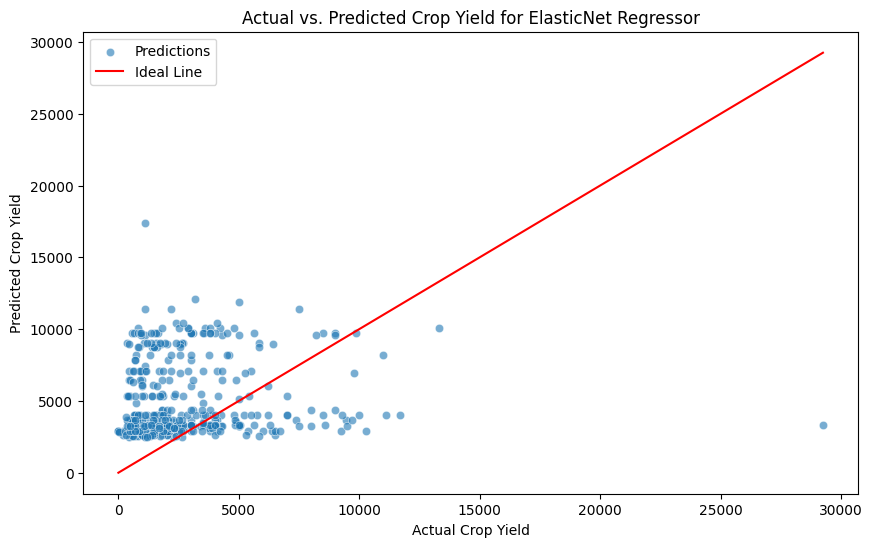

In [ ]:
# Function to plot actual vs. predicted values
def plot_predictions(y_true, y_pred, model):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, label='Predictions')
    sns.lineplot(x=[min(y_true), max(y_true)], y=[min(y_true), max(y_true)], color='red', label='Ideal Line')
    plt.xlabel('Actual Crop Yield')
    plt.ylabel('Predicted Crop Yield')
    plt.title(f'Actual vs. Predicted Crop Yield for {model}')
    plt.legend()
    plt.show()

# Evaluate the model performance and plot
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"Root Mean Squared Error: {rmse}")
# print(f"R2 Score: {r2}")

# Plot the predictions
plot_predictions(y_test, y_pred, 'ElasticNet Regressor')